# First Iteration

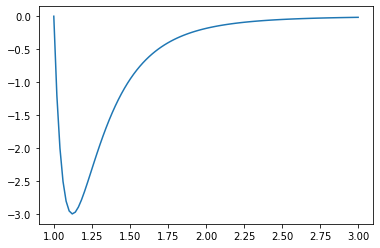

minimum value:    -2.9998650296000307
minimum value with random search:  -2.9581801799018757


In [12]:
import numpy as np
import matplotlib.pyplot as plt

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 3*4*(1/r12 - 1/r6)

r = np.linspace(1.0,3.0,100)
plt.plot(r, LJ(r))
plt.show()

#Since there are 3 bonds of equal distance, they will have the same v through all 3 bonds and we just need
#to find the sum of the three bonds

print('minimum value:   ', min(LJ(r)))

def random_search(N):
    minf = LJ(1.0)
    x0 = x_min
    x1 = x0
    
    for i in range(1,N):
        x0 = x_min+np.random.random()*(x_max-x_min)
        if LJ(x0) <= LJ(x1):
            minf = LJ(x0)
            x1 = x0
    
    return minf

print('minimum value with random search: ', random_search(10))

# Second iteration, using scipy optimization

In [14]:
from scipy.optimize import minimize
from numba import jit

@jit
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

@jit
def total_energy(positions):
    """
    Calculate the total energy
    input:
    positions: 3*N array which represents the atomic positions
    output
    E: the total energy
    """
    E = 0
    N_atom = int(len(positions)/3)

    #positions = [x0, y0, z0, x1, y1, z1, .....  , xn, yn, zn]
    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            #print('pos1:  ', pos1)
            #print('pos2:  ', pos2)
            dist = np.linalg.norm(pos1-pos2)
            #print(i,j, dist)
            E += LJ(dist)
    return E

@jit
def init_pos(N, L=5):
    return L*np.random.random_sample((N*3,))

f_values = []
x_values = []
N_attempts = 10
N_atom = 3
for i in range(N_attempts):
    pos = init_pos(N_atom)
    res = minimize(total_energy, pos, method='CG', tol=1e-4)
    f_values.append(res.fun)
    x_values.append(res.x)
    if i%10==0:
        print('step: ', i, '  values:', res.fun)

print('The global minimum:  ', min(f_values))
#Much much closer to 3 than previous iteration

step:  0   values: -2.9999999999995857
The global minimum:   -2.9999999999999973
